In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization (optional, for later steps)
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning - clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# For loading data in Colab
from google.colab import files


In [5]:
df = pd.read_csv('Normalized_bank_transactions.csv', on_bad_lines='skip')
print(df.head())


  CustomerID;"CustGender";"CustLocation";"Age";"Normalized_Account_Balance";"Normalized_Transaction_Amount"
0  C5841053;"F";"JAMSHEDPUR";31;0.000154900450374...                                                       
1  C2142763;"M";"JHAJJAR";0;1.9739037920653066e-0...                                                       
2  C4417068;"F";"MUMBAI";28;0.0001553819539304960...                                                       
3  C5342380;"F";"MUMBAI";52;0.007532485597134619;...                                                       
4  C9031234;"F";"NAVI MUMBAI";37;5.83683322626913...                                                       


In [6]:
df = pd.read_csv('Normalized_bank_transactions.csv', sep=';', quotechar='"', on_bad_lines='skip')
print(df.head())

  CustomerID CustGender CustLocation  Age  Normalized_Account_Balance  \
0   C5841053          F   JAMSHEDPUR   31                    0.000155   
1   C2142763          M      JHAJJAR    0                    0.000020   
2   C4417068          F       MUMBAI   28                    0.000155   
3   C5342380          F       MUMBAI   52                    0.007532   
4   C9031234          F  NAVI MUMBAI   37                    0.000058   

   Normalized_Transaction_Amount  
0                       0.000035  
1                       0.038887  
2                       0.000637  
3                       0.002861  
4                       0.002448  


In [9]:
#Extracting the features into a numpy array

features = df[['Age', 'Normalized_Account_Balance', 'Normalized_Transaction_Amount']].copy()
features = features[features['Age'] > 0]  # Example: remove zero or negative ages


In [11]:
#Standardize features again with sklearn’s StandardScaler:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [12]:
#Run the K means method

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Choose number of clusters
k = 4

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to original dataframe
df.loc[features.index, 'Cluster'] = kmeans.labels_

# Display count of customers per cluster
print(df['Cluster'].value_counts())


Cluster
0.0    95437
2.0    45154
1.0       73
3.0        9
Name: count, dtype: int64


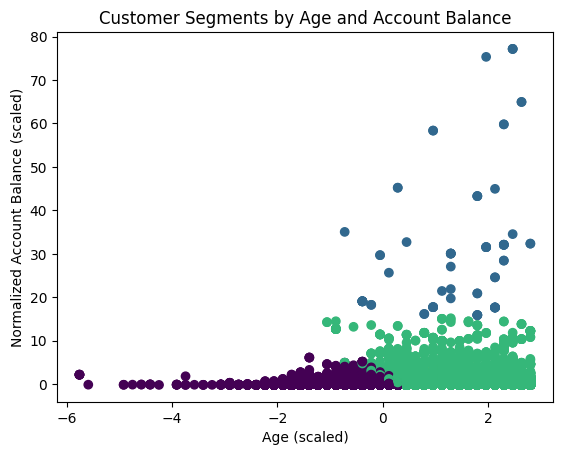

In [13]:
#Plot the clusters

plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Age (scaled)')
plt.ylabel('Normalized Account Balance (scaled)')
plt.title('Customer Segments by Age and Account Balance')
plt.show()


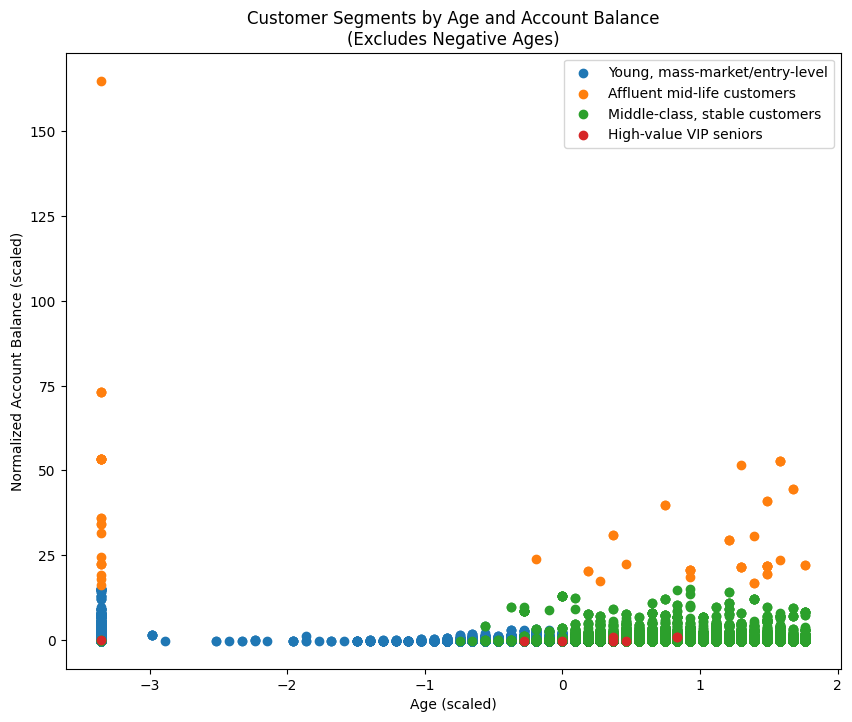

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Filter to exclude negative ages
valid_age_mask = df['Age'] >= 0
filtered_df = df[valid_age_mask]
filtered_features = filtered_df[['Age', 'Normalized_Account_Balance', 'Normalized_Transaction_Amount']]
filtered_scaled_features = scaler.fit_transform(filtered_features)
filtered_labels = kmeans.predict(filtered_scaled_features)

# Map cluster number to descriptive category
cluster_names = {
    0: 'Young, mass-market/entry-level',
    1: 'Affluent mid-life customers',
    2: 'Middle-class, stable customers',
    3: 'High-value VIP seniors'
}

k = len(cluster_names)

plt.figure(figsize=(10,8))
for i in range(k):
    plt.scatter(
        filtered_scaled_features[filtered_labels == i, 0],
        filtered_scaled_features[filtered_labels == i, 1],
        label=cluster_names[i]
    )

plt.xlabel('Age (scaled)')
plt.ylabel('Normalized Account Balance (scaled)')
plt.title('Customer Segments by Age and Account Balance\n(Excludes Negative Ages)')
plt.legend()
plt.show()
